In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
Url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
df = pd.read_csv(Url)

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier


In [90]:
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [91]:
pd.isna(df).sum() >0

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [92]:
np.where(df['Age'].isnull())

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888], dt

In [93]:
np.where(df['Cabin'].isnull())  # HUGE NAN VALUES

(array([  0,   2,   4,   5,   7,   8,   9,  12,  13,  14,  15,  16,  17,
         18,  19,  20,  22,  24,  25,  26,  28,  29,  30,  32,  33,  34,
         35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
         48,  49,  50,  51,  53,  56,  57,  58,  59,  60,  63,  64,  65,
         67,  68,  69,  70,  71,  72,  73,  74,  76,  77,  78,  79,  80,
         81,  82,  83,  84,  85,  86,  87,  89,  90,  91,  93,  94,  95,
         98,  99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 111, 112,
        113, 114, 115, 116, 117, 119, 120, 121, 122, 125, 126, 127, 129,
        130, 131, 132, 133, 134, 135, 138, 140, 141, 142, 143, 144, 145,
        146, 147, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160,
        161, 162, 163, 164, 165, 167, 168, 169, 171, 172, 173, 175, 176,
        178, 179, 180, 181, 182, 184, 186, 187, 188, 189, 190, 191, 192,
        196, 197, 198, 199, 200, 201, 202, 203, 204, 206, 207, 208, 210,
        211, 212, 213, 214, 216, 217, 219, 220, 221

In [94]:
df.iloc[np.where(df['Embarked'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [95]:
df.dtypes[df.dtypes == 'object']


# TO GET ALL THE COLUMNS WITH OBJECT DATATYPE

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [96]:
np.where(df['Embarked'].isnull()) #LESS NULL VALUESS

(array([ 61, 829], dtype=int64),)

In [97]:
# FROM LOOKING AT THE NULL VALUES AND THE FEATURES WE CAN DROP FEW FEATURES

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\Mayank\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age', ylabel='Density'>

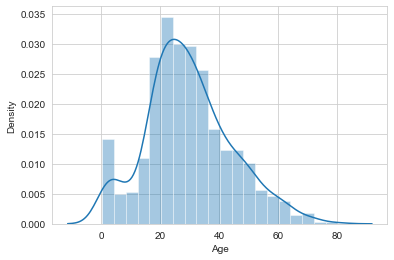

In [99]:
# LEST VISUALIZE
sns.distplot(df['Age'])  # FAIRLY NORMALLY DISTRIBUTED COLUMN

C:\Users\Mayank\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Fare', ylabel='Density'>

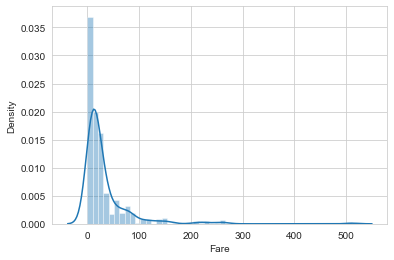

In [100]:
sns.distplot(df['Fare'])

<AxesSubplot:>

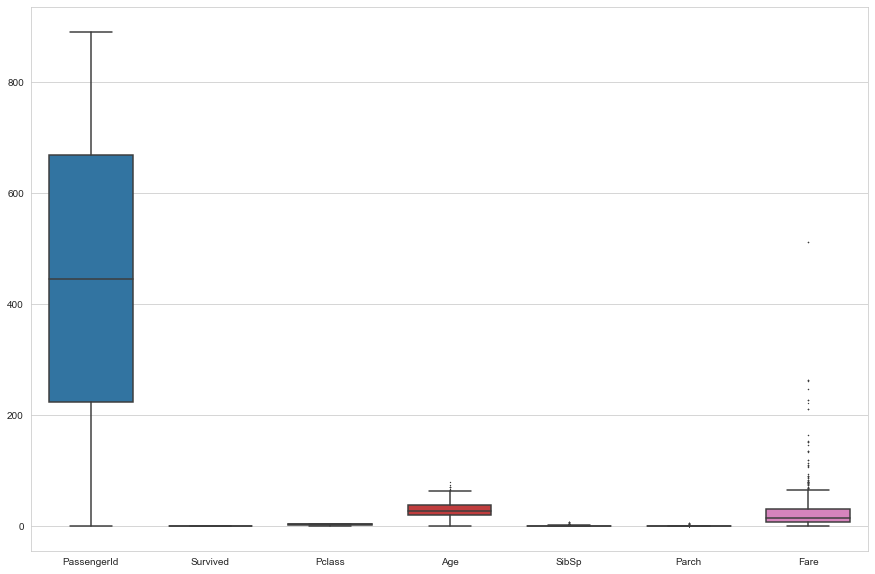

In [101]:
fig,ax = plt.subplots(figsize = (15,10))

sns.boxplot(data=df , width=0.7, ax=ax, fliersize = 0.5)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

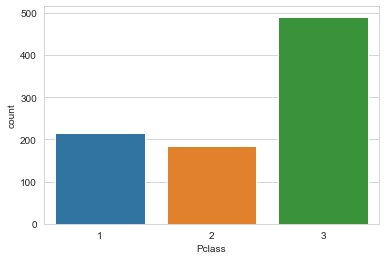

In [102]:
sns.countplot(x='Pclass',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

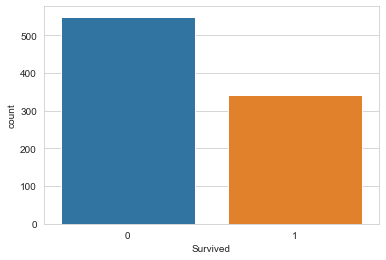

In [103]:
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

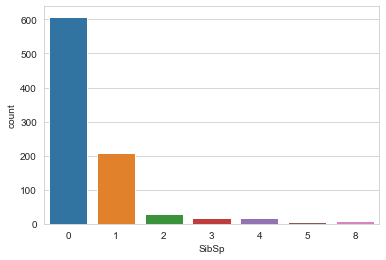

In [104]:
sns.countplot(x='SibSp',data=df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

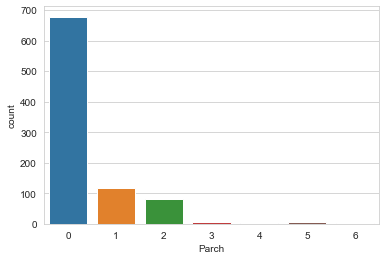

In [105]:
sns.countplot(x='Parch',data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

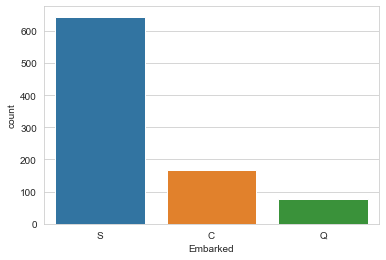

In [106]:
sns.countplot(x='Embarked',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

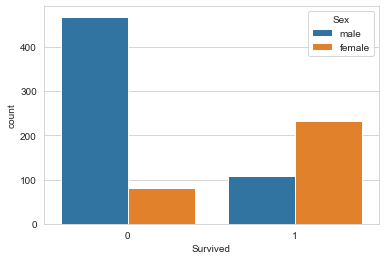

In [107]:
# 
sns.set_style('whitegrid')

sns.countplot(x='Survived',hue='Sex',data=df)

#Obervation:- alot of males didnt survive and alot females survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

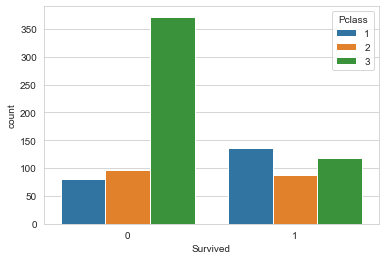

In [108]:
sns.countplot(x='Survived',hue='Pclass',data=df)


#OBSERVATION:- MANY PCLASS 3 PPL HAVE DIED AND MORE PCLASS1 HAVE SURVIVED

In [109]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
import cufflinks as cf
cf.go_offline()

In [111]:
df['Fare'].iplot(kind ='hist',bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

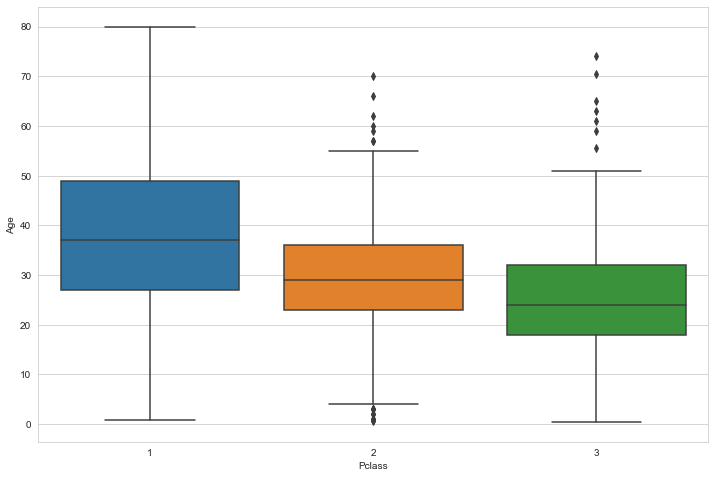

In [112]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data=df)

In [113]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Age', ylabel='Count'>

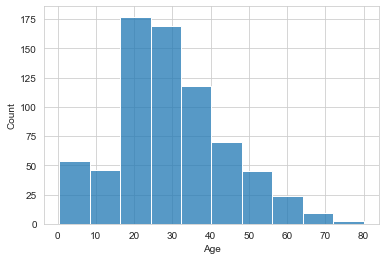

In [114]:
#FILLING NAN VALUES FOR AGE COLUMN

sns.histplot(x='Age',bins=10,data= df)

In [115]:
df.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [116]:
# TO REPLACE AGE MISSING VALUES

def age_replacement(cols):
    
    age = cols[0]
    
    pclass = cols[1]
    
    if pd.isnull(age):
        
        if pclass == 1:
            
            return 37
        elif pclass == 2:
            
            return 29
        
        else:
            
            return 25
        
    else:
        
        return age
    
    

In [117]:
df['Age'] = df[['Age','Pclass']].apply(age_replacement,axis=1)

In [118]:
pd.isnull(df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [119]:
df = df.drop('Cabin',axis=1)


<AxesSubplot:>

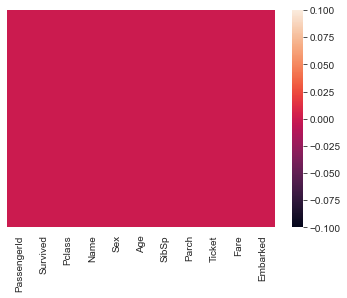

In [125]:
sns.heatmap(df.isnull(),yticklabels=False)

<AxesSubplot:>

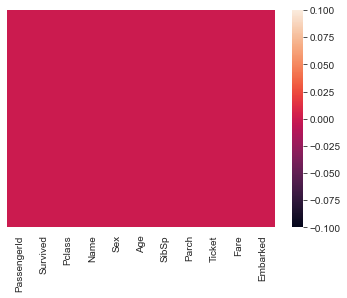

In [124]:
sns.heatmap(df.isnull(),yticklabels=False)

In [122]:
df.dropna(inplace=True)

In [123]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [126]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


 # FEATURE ENGINEERING

In [35]:
# we can remobe the ticket column and we need to encode sex and Embarked columns

enciding the sex column

In [127]:
df['Sex'].value_counts() #2 cat

male      577
female    312
Name: Sex, dtype: int64

In [128]:
df['Embarked'].value_counts() # 3 cat

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [129]:
X = df.drop(['PassengerId', 'Survived','Name', 'Ticket'],axis=1)
y = df['Survived']

In [130]:
X['Sex'] = pd.get_dummies(X['Sex']).values

In [134]:
X['Embarked'] = pd.get_dummies(X['Embarked']).values

In [135]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,0
888,3,1,25.0,1,2,23.4500,0
889,1,0,26.0,0,0,30.0000,1


In [136]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [137]:
from sklearn.model_selection import train_test_split

In [142]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state= 30)

In [143]:
model = DecisionTreeClassifier()

In [144]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [145]:
model.score(x_test,y_test)

0.7565543071161048

In [146]:
# CHECKING CONFUSION MATRIX AND VARIOUS ACCURACY PARAMETERS

y_pred = model.predict(x_test)

In [147]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [148]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7565543071161048

In [149]:
conf_mat = confusion_matrix(y_test,y_pred)

In [150]:
conf_mat

array([[131,  31],
       [ 34,  71]], dtype=int64)

In [151]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [152]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7565543071161048

In [153]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.808641975308642

In [154]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.793939393939394

In [155]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8012232415902141

In [156]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7424162257495591

In [157]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

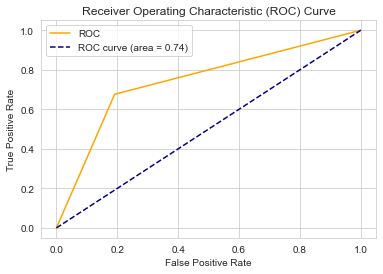

In [158]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# lets try to improve accuracy using 
# hyperparameter tuning

In [159]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [160]:
grid_search = GridSearchCV(estimator=model,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [161]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [162]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 3, 'splitter': 'random'}


In [163]:
grid_search.best_score_

0.8279870967741936

In [164]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =15, min_samples_leaf= 6, min_samples_split= 3, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=6,
                       min_samples_split=3, splitter='random')

In [165]:
clf.score(x_test,y_test)

0.8014981273408239

In [166]:
import pickle

In [167]:
# Writing different model files to file
with open( 'Decision_Tree_assignment1_final.sav', 'wb') as f:
    pickle.dump(clf,f)
    


In [168]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
237,2,1,8.0,0,2,26.2500,0
114,3,1,17.0,0,0,14.4583,1
291,1,1,19.0,1,0,91.0792,1
500,3,0,17.0,0,0,8.6625,0
101,3,0,25.0,0,0,7.8958,0
...,...,...,...,...,...,...,...
457,1,1,37.0,1,0,51.8625,0
695,2,0,52.0,0,0,13.5000,0
17,2,0,29.0,0,0,13.0000,0
520,1,1,30.0,0,0,93.5000,0
